# 2. Exploratory Data Analysis

In [1]:
#Import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Load the data
df = pd.read_csv('Data/Corona_NLP.csv', index_col=0)

Because this is a categorization problem, there isn't much EDA to be done until I tokenize and vectorize all of 
the words in the OriginalTweet column during the pre-processing stage of analysis. For now, I've simply produced a 
value count of the different sentiment scores, plotted it as a histogram, and assessed how well my own impression 
of the data coheres with the sentiment scores assigned by the dataset's creator using a hypothesis test.

In [3]:
df['Sentiment'].value_counts()

Positive              12366
Negative              10951
Neutral                8315
Extremely Positive     7223
Extremely Negative     6071
Name: Sentiment, dtype: int64

Interestingly, the value count skews toward the positive with more positive tweets than negative ones and 
more extremely positive tweets than extremely negative ones. Neutral tweets are also less common than positive and
negative tweets, yielding a distribution with two peaks. 

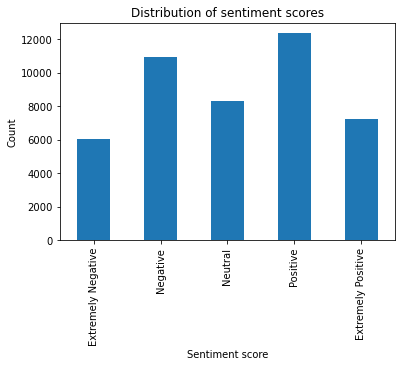

In [4]:
df['Sentiment'].value_counts().loc[['Extremely Negative', 'Negative', 'Neutral', 'Positive', 'Extremely Positive']].plot.bar()
plt.xlabel('Sentiment score')
plt.ylabel('Count')
plt.title('Distribution of sentiment scores')
plt.show();

Assessment of sentiment depends on a variety of factors (e.g., cultural context, individual disposition, etc.). 
Therefore, it is important to determine whether and to what extent I agree with the sentiment scores that 
the dataset's creator assigned to each Tweet. To do so, I examined a pseudo-random sample of ten Tweets and added 
my own sentiment scores to the sample data.  

In [5]:
pd.set_option('display.max_colwidth', 500)
sample = df.sample(10, random_state=34) #set the random state to ensure reproducibility
sample['OriginalTweet']
sample["Aren's Sentiment"] = ['Extremely Positive', 'Negative', 'Positive', 'Neutral', 'Positive', 'Negative', 'Positive', 'Positive', 'Negative', 'Negative']

I then checked them against the scores assigned by the dataset's creator. 

In [6]:
sample

,OriginalTweet,Sentiment,Aren's Sentiment
12836,"During this #Covid_19 pandemic, lets appreciate and thank the #heroes: the grocery store clerks, the emergency responders, nurses, bus drivers, garbage collectors, social services staff, and everyone in between. https://t.co/TfcvqoXoow\r\r\n\r\r\n#workers #essentialworkers",Positive,Extremely Positive
28591,Police ask carers and supermarket delivery drivers to look for signs of domestic abuse #coronavirus https://t.co/OOb9WEsWns,Extremely Negative,Negative
37276,"Beyond Meat donating one million vegan burgers to front line workers. \r\r\n\r\r\nBecause no one wants to buy them at the grocery store. \r\r\n\r\r\nIn all seriousness, good on them. \r\r\n\r\r\nhttps://t.co/nG2k2lI4Zx",Positive,Positive
37521,I just bought 3 containers of hand sanitizer and some face masks from behind the counter. Oh how times have changed #coronavirus #COVID19 #COVID,Positive,Neutral
22154,"The company said Sunday it will initially produce 50,000 bottles of hand sanitizer, at five locations across the country, that will be donated to Food Banks Canada #CanadaCovid19 #coronawarriors #coronavirus https://t.co/oXPodZI2Bf",Positive,Positive
42301,"My son kept asking, Is Daddy going to die? Is he going to die today? one parent who survived Covid-19 in Utah said. It was good to be able to tell him no.\r\r\nhttps://t.co/YG1t2JtACh",Negative,Negative
21235,"I tipped the grocery store clerk this afternoon, theyre on the frontlines also and I appreciate what theyre doing #coronavirus",Positive,Positive
35481,Local gas station drops prices spreads positivity for a day,Positive,Positive
685,Craziness at the #Zehrs grocery store here in #Barrie - no more #toiletpaper! #CoronavirusPandemic #CoronaOutbreak #Covid_19 - ??? I think people need to chill a bit! https://t.co/qqc2OsRhtO,Negative,Negative
11572,When the highlight of your day is going to the supermarket and you should be on the beach sipping cocktails ??#coronavirus,Positive,Negative


As the resulting DataFrame shows, our sentiment scores differ in several places. But how serious are these 
differences? To assess this, I replaced the categories with numbers and calculated the differences in our scores.

In [7]:
replacement_values = {"Extremely Negative": 0, "Negative" : 1, "Neutral" : 2, "Positive" : 3, "Extremely Positive" : 4}
sample["Sentiment"].replace(replacement_values, inplace=True)
sample["Aren's Sentiment"].replace(replacement_values, inplace=True)
sample["Difference"] = np.abs(sample["Sentiment"] - sample["Aren's Sentiment"])
sample

,OriginalTweet,Sentiment,Aren's Sentiment,Difference
12836,"During this #Covid_19 pandemic, lets appreciate and thank the #heroes: the grocery store clerks, the emergency responders, nurses, bus drivers, garbage collectors, social services staff, and everyone in between. https://t.co/TfcvqoXoow\r\r\n\r\r\n#workers #essentialworkers",3,4,1
28591,Police ask carers and supermarket delivery drivers to look for signs of domestic abuse #coronavirus https://t.co/OOb9WEsWns,0,1,1
37276,"Beyond Meat donating one million vegan burgers to front line workers. \r\r\n\r\r\nBecause no one wants to buy them at the grocery store. \r\r\n\r\r\nIn all seriousness, good on them. \r\r\n\r\r\nhttps://t.co/nG2k2lI4Zx",3,3,0
37521,I just bought 3 containers of hand sanitizer and some face masks from behind the counter. Oh how times have changed #coronavirus #COVID19 #COVID,3,2,1
22154,"The company said Sunday it will initially produce 50,000 bottles of hand sanitizer, at five locations across the country, that will be donated to Food Banks Canada #CanadaCovid19 #coronawarriors #coronavirus https://t.co/oXPodZI2Bf",3,3,0
42301,"My son kept asking, Is Daddy going to die? Is he going to die today? one parent who survived Covid-19 in Utah said. It was good to be able to tell him no.\r\r\nhttps://t.co/YG1t2JtACh",1,1,0
21235,"I tipped the grocery store clerk this afternoon, theyre on the frontlines also and I appreciate what theyre doing #coronavirus",3,3,0
35481,Local gas station drops prices spreads positivity for a day,3,3,0
685,Craziness at the #Zehrs grocery store here in #Barrie - no more #toiletpaper! #CoronavirusPandemic #CoronaOutbreak #Covid_19 - ??? I think people need to chill a bit! https://t.co/qqc2OsRhtO,1,1,0
11572,When the highlight of your day is going to the supermarket and you should be on the beach sipping cocktails ??#coronavirus,3,1,2


Overall there is a mean difference of .5 between our scores.

In [8]:
np.mean(sample['Difference'])

0.5

But with such a small sample size, the mean difference is more sensitive to outliers. If, for example, the dataset's creator and I only agree about a small number of cases and most of these outliers are present in the sample, then the mean difference would be artificially depressed. To test whether or not this is the case, I've checked how the average mean difference changes as the number of samples increases. 

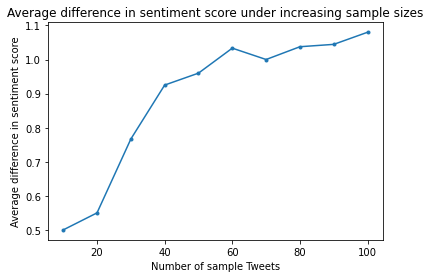

In [9]:
sample_sizes = np.arange(10, 110, 10)

variable_sample = df.sample(100, random_state=34)
variable_sample["Aren's Sentiment"] = ['Extremely Positive', 'Negative', 'Positive', 'Neutral', 'Positive', 'Negative', 'Positive', 'Positive', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Extremely Negative', 'Positive', 'Positive', 'Positive', 'Neutral', 'Neutral', 'Positive', 'Positive', 'Positive', 'Negative', 'Neutral', 'Negative', 'Neutral', 'Neutral', 'Negative', 'Positive', 'Negative', 'Positive', 'Neutral', 'Neutral', 'Extremely Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Extremely Negative', 'Extremely Negative', 'Negative', 'Extremely Negative', 'Neutral', 'Extremely Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Neutral', 'Neutral', 'Neutral', 'Negative', 'Neutral', 'Extremely Positive', 'Extremely Negative', 'Negative', 'Negative', 'Negative', 'Neutral', 'Negative', 'Positive', 'Neutral', 'Positive', 'Neutral', 'Negative', 'Extremely Positive', 'Negative', 'Negative', 'Neutral', 'Negative', 'Neutral', 'Negative', 'Negative', 'Neutral', 'Negative', 'Extremely Negative', 'Negative', 'Positive', 'Positive', 'Negative', 'Extremely Negative', 'Negative', 'Negative', 'Neutral', 'Negative', 'Negative', 'Neutral', 'Positive', 'Extremely Negative', 'Neutral', 'Negative', 'Negative', 'Negative', 'Neutral', 'Extremely Positive']
variable_sample["Sentiment"].replace(replacement_values, inplace=True)
variable_sample["Aren's Sentiment"].replace(replacement_values, inplace=True)
variable_sample["Difference"] = np.abs(variable_sample["Sentiment"] - variable_sample["Aren's Sentiment"])  

mean_diffs = [np.mean(variable_sample.iloc[:size]['Difference']) for size in sample_sizes]

plt.plot(sample_sizes, mean_diffs, marker='.')
plt.xlabel('Number of sample Tweets')
plt.ylabel('Average difference in sentiment score')
plt.title('Average difference in sentiment score under increasing sample sizes')
plt.show();

As the chart shows, the mean difference increases as the sample size increases, but plateaus around 1.08. But what exactly does this mean? Does it indicate compatibility or incompatibility?  

We can answer this question by preforming a hypothesis test using 10000 bootstrap resamples of both the 10 tweet and 100 tweet samples. The null hypothesis is that our sentiment scores are fundamentally incompatible (i.e., have a mean difference of 2 or more, which corresponds to a change from negative to positive or vice-versa); the alternative hypothesis is that they are compatible.  

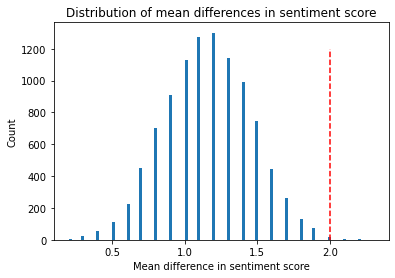

In [10]:
avg_diffs_10 = np.empty(10000)
np.random.seed(42) #set the seed to ensure reproducibility

for i in range(10000):
    avg_diffs_10[i] = np.mean(np.abs(sample["Sentiment"] - np.random.choice(sample["Aren's Sentiment"], 10)))

fig, ax = plt.subplots()
ax.hist(avg_diffs_10, bins=100)
ax.vlines(2, ymin=0, ymax=1200, color='red', linestyle='--')
ax.set_xlabel('Mean difference in sentiment score')
ax.set_ylabel('Count')
ax.set_title('Distribution of mean differences in sentiment score')
plt.show();

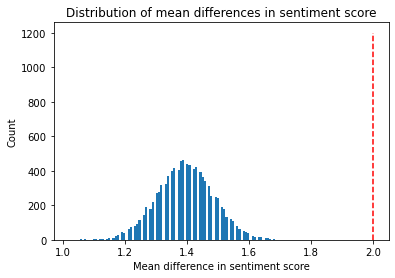

In [11]:
avg_diffs_100 = np.empty(10000)
np.random.seed(42) #set the seed to ensure reproducibility

for i in range(10000):
    avg_diffs_100[i] = np.mean(np.abs(variable_sample["Sentiment"] - np.random.choice(variable_sample["Aren's Sentiment"], 100)))

fig, ax = plt.subplots()
ax.hist(avg_diffs_100, bins=100)
ax.vlines(2, ymin=0, ymax=1200, color='red', linestyle='--')
ax.set_xlabel('Mean difference in sentiment score')
ax.set_ylabel('Count')
ax.set_title('Distribution of mean differences in sentiment score')
plt.show();

The p value for a mean of 2.0 is very low (.0012) for the 10 Tweet sample (indicating that we would expect a mean difference in sentiment score of 2.0 or higher in only .12% of simulations due to natural variability alone.) and extremely low (less than .0001) for the 100 Tweet sample. So I feel fairly confident in rejecting the null hypothesis and using the sentiment scores included in the dataset as a convenient proxy for my
own. 

In [12]:
p10 = len(avg_diffs_10[avg_diffs_10 > 2.0])/len(avg_diffs_10)
p10

0.0012

In [13]:
p100 = len(avg_diffs_100[avg_diffs_100 > 2.0])/len(avg_diffs_100)
p100

0.0